# Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## Overview of Data

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


### Info on Dataframe

In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The cell above is a `Pandas` method that allows to examine some descriptive information at a high level about the dataset we are reviewing. For example, you can note the number of columns that dataset has with the column names right next to the column index. There are 9 columns in this dataset. Remember, we start counting at 0 in Computer Science. There are also 48,204 rows. Entries stand for rows when using this function.


### Frequency Distribution Histogram

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

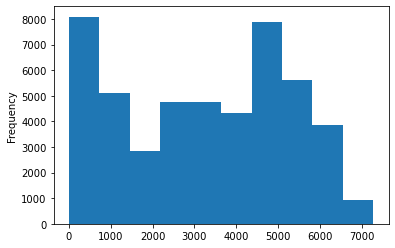

In [5]:
i_94['traffic_volume'].plot.hist()
plt.show()

The histogram above details the frequency distribution of the `traffic_volume` column in the dataset. For example, if we look to the far right, we see a small bar right above the number 7,000. If we keep our eyes on the height of that bar and then scan to the far left, we see the number 1,000 on the y-axis (Frequency axis). In essence, traffic volume got up to 7,000 vehicles approximately 1,000 times over the span of time the creators of this dataset examined.

### Traffic Volume Descriptive Statistics

In [6]:
print(i_94['traffic_volume'].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


The function above gives us a quick table of descriptive statistics about a column or row of data. For example, the average, or mean, amount of traffic volume was 3259.818355, the max amount was 7280.000000, and the minimum amount was 0.000000. What can we deduce from this? Clearly there was a time when there was no traffic on the road for the stretch of interstate that has been examined in this dataset. The most likely conclusion is that this was at night. It would seem implausible to assume this happened at anypoint during daylight hours. 

***

# Main Analysis: Patterns and Influential Factors on Traffic

## Nighttime and Daytime

In [7]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


We want to see how nighttime and daytime might influence traffic volume. In order to do this, in the code cell above we needed to convert the `date_time` column to an actual datetime type and then using boolean expressions, split up the column into 2 seperate lists of data: 

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

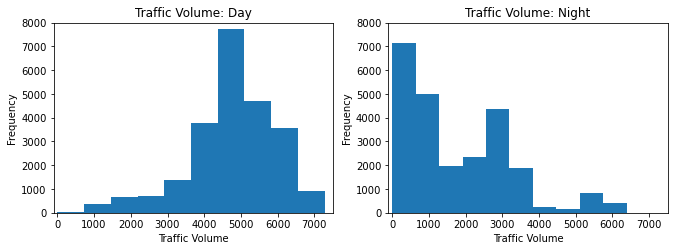

In [8]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for the daytime traffic volumes has a left skewed distribution with the majority of the values bulking up to the right of the plot. The histogram for the nighttime traffic volumes has a right skewed distribution with the majority of the values bulking up to the left of the plot and then trending downward. Since the goal of this project is to find indicators of heavy traffic, and the traffic is light at night, we will discard the nighttime traffic from our continued analysis. 

## Month, Day, Hour

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

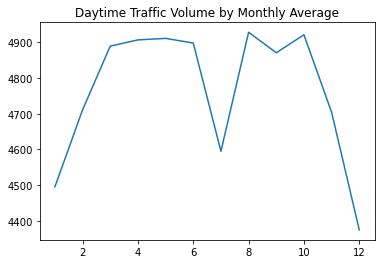

In [12]:
plt.plot(by_month['traffic_volume'])
plt.title('Daytime Traffic Volume by Monthly Average')
plt.show()

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

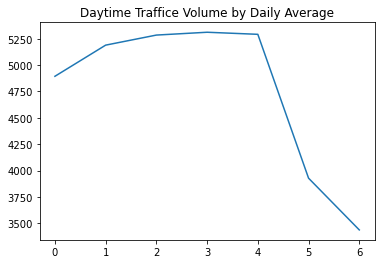

In [14]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Daytime Traffice Volume by Daily Average')
plt.show()

Looking at the line plot above, one can notice that there is a steep decline from the average of daily daytime traffic during business days to the average daily daytime traffice of the weekend. Next we will extract the hour from the `date_time` column, split it up by business and weekend days, then plot each group by their hourly average of traffic volume.

In [15]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


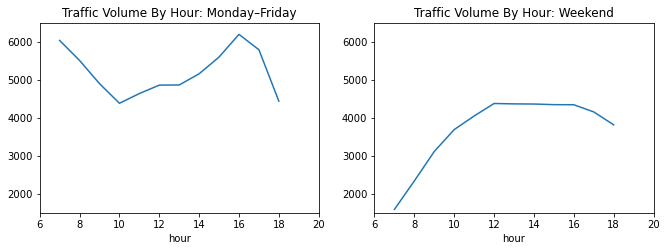

In [16]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

## Weather

In [17]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

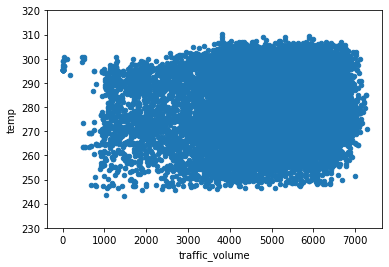

In [18]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

From observing the scatter plot above, it appears that using the weather indicator of temperature doesn't demonstrate that it is correlated to an increase in traffic volume. We will next review the weather types.

In [19]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

print(by_weather_main)
print(by_weather_description)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

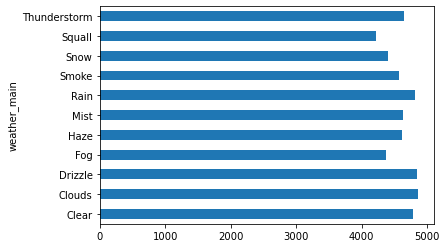

In [20]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It appears there is no weather type where traffic volume exceeds 5,000 vehicles. All of them appear to have pretty much the same traffic volume.

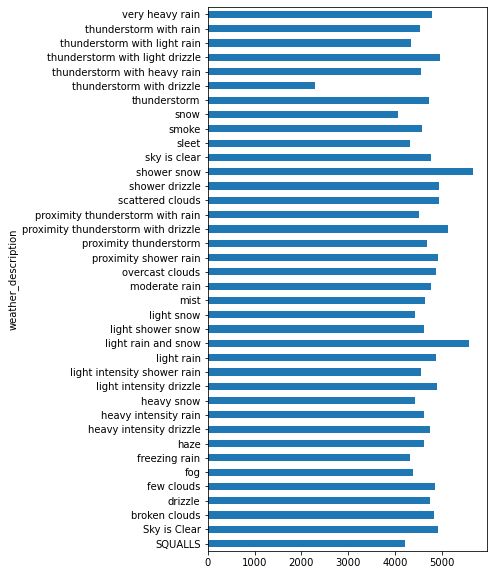

In [21]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.show()

Interestingly, there are some more granular descriptons of the weather types in this dataset that appear to be affecting the traffic volume. Light rain and snow, as well as snow showers appear to have traffic volumes over 5,000 vehicles. It would be faulty to assume that this weather is actually increasing the amount of traffic on this stretch of road. Common sense clearly indicates that this can be somewhat dangerous weather and driving during this type of weather is ill advised. 

***

## Final Conclusions

Upon examining this dataset, there certainly appears to be correlations between seasonality and the amount of traffic on the road. These seasonality factors include hour of the day, day of the week, month in the year, etc. 

However, a strong conclusion cannot be made on whether certain weather types affect the traffic volume for this stretch of interstate. The traffic volume on the surface appears to remain constant regardless of the weather. As well, where the traffic does increase, it is linked to less than desirable driving weather, albeit some would even classify it as potentially dangerous. 

